In [1]:
# Thêm thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [2]:
data = pd.read_csv('heart.csv')
print('Kích thước bộ dữ liệu là', data.shape)

Kích thước bộ dữ liệu là (15000, 14)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-61.0,1.0,0.0,125.0,304.0,0.0,0.0,162.0,1.0,0.0,2.0,3.0,2.0,0.0
1,51.0,1.0,2.0,94.0,227.0,0.0,1.0,154.0,1.0,0.0,2.0,1.0,3.0,1.0
2,60.0,1.0,0.0,130.0,206.0,0.0,0.0,132.0,1.0,2.4,1.0,NaN,3.0,0.0
3,46.0,1.0,0.0,140.0,311.0,0.0,1.0,120.0,1.0,1.8,1.0,2.0,3.0,0.0
4,57.0,1.0,0.0,150.0,276.0,0.0,0.0,112.0,1.0,0.6,1.0,1.0,1.0,0.0


In [4]:
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [5]:
#TIỀN XỬ LÍ DỮ LIỆU
# kiểm tra dữ liệu bị khuyết
data.isna()

# data = data[data['ca'] < 4] # xóa các giá trị sai ở cột 'ca'
# data = data[data['thal'] > 0] # xóa các giá trị sai ở cột 'thal'
# print(f'Độ dài của dữ liệu bây giờ là {len(data)} thay vì 303')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# xóa những dòng chứa giá trị bị khuyết
data = data.dropna()
# kiểm tra dữ liệu bị khuyết
#data.isna()
print(f'Độ dài của dữ liệu bây giờ là {len(data)} thay vì 15000')


Độ dài của dữ liệu bây giờ là 14166 thay vì 15000


In [7]:
#thống kê tóm tắt cho từng cột số để phát hiện ngoại lai
# .T: để chuyển từ cột sang hàng
data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,14166.0,48.080121,27.332157,-99.0,45.0,54.0,60.0,77.0
sex,14166.0,0.675208,0.468314,0.0,0.0,1.0,1.0,1.0
cp,14166.0,0.983835,1.034161,0.0,0.0,1.0,2.0,3.0
trestbps,14166.0,120.918114,46.139007,-99.0,120.0,130.0,140.0,200.0
chol,14166.0,229.373429,86.536497,-99.0,204.0,236.0,274.0,564.0
fbs,14166.0,0.148383,0.355492,0.0,0.0,0.0,0.0,1.0
restecg,14166.0,0.522307,0.524611,0.0,0.0,1.0,1.0,2.0
thalach,14166.0,138.091134,52.460630,-99.0,130.0,151.0,165.0,202.0
exang,14166.0,0.323239,0.467730,0.0,0.0,0.0,1.0,1.0
oldpeak,14166.0,1.023338,1.142570,0.0,0.0,0.8,1.6,6.2


In [8]:
# Hàm xóa bỏ các giá trị ngoại lai bằng phương pháp IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Các thuộc tính cần xóa bỏ giá trị ngoại lai
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Xóa bỏ các giá trị ngoại lai cho từng thuộc tính
for column in columns:
    if column in data.columns:
        data = remove_outliers(data, column)
    else:
        print(f"Column '{column}' does not exist in the DataFrame")
data.describe().T
# data = data[data['ca'] < 4] # xóa các giá trị sai ở cột 'ca'
# data = data[data['thal'] > 0] # xóa các giá trị sai ở cột 'thal'
print(f'Độ dài của dữ liệu bây giờ là {len(data)} thay vì 14166')


Độ dài của dữ liệu bây giờ là 8781 thay vì 14166


In [9]:
data = data.rename(
    columns = {'age': 'Tuổi',
               'sex': 'Giới tính',
               'cp':'Loại đau ngực', 
               'trestbps':'Huyết áp khi nghỉ ngơi', 
               'chol': 'Cholesterol trong máu',
               'fbs': 'Đường huyết lúc đói',
               'restecg' : 'Kết quả điện tâm đồ lúc nghỉ ngơi', 
               'thalach': 'Nhịp tim tối đa khi gắng sức', 
               'exang': 'Đau thắt ngực do gắng sức',
               'oldpeak': 'Sự chênh lệch ST', 
               'slope': 'Độ dốc đoạn ST', 
               'ca':'Số mạch máu chính bị hẹp', 
               'thal': 'Thalassemia'}, 
    errors="raise")

In [10]:
data['Giới tính'][data['Giới tính'] == 0] = 'Nữ'
data['Giới tính'][data['Giới tính'] == 1] = 'Nam'

data['Loại đau ngực'][data['Loại đau ngực'] == 0] = 'Đau thắt điển hình'
data['Loại đau ngực'][data['Loại đau ngực'] == 1] = 'Đau thắt ngực không điển hình'
data['Loại đau ngực'][data['Loại đau ngực'] == 2] = 'Không đau thắt'
data['Loại đau ngực'][data['Loại đau ngực'] == 3] = 'Không có triệu chứng'

data['Đường huyết lúc đói'][data['Đường huyết lúc đói'] == 0] = 'Thấp hơn 120mg/ml'
data['Đường huyết lúc đói'][data['Đường huyết lúc đói'] == 1] = 'Cao hơn 120mg/ml'

data['Kết quả điện tâm đồ lúc nghỉ ngơi'][data['Kết quả điện tâm đồ lúc nghỉ ngơi'] == 0] = 'Bình thường'
data['Kết quả điện tâm đồ lúc nghỉ ngơi'][data['Kết quả điện tâm đồ lúc nghỉ ngơi'] == 1] = 'ST-T bất thường'
data['Kết quả điện tâm đồ lúc nghỉ ngơi'][data['Kết quả điện tâm đồ lúc nghỉ ngơi'] == 2] = 'Bất thường khác'

data['Đau thắt ngực do gắng sức'][data['Đau thắt ngực do gắng sức'] == 0] = 'Không'
data['Đau thắt ngực do gắng sức'][data['Đau thắt ngực do gắng sức'] == 1] = 'Có'

data['Độ dốc đoạn ST'][data['Độ dốc đoạn ST'] == 0] = 'Dốc lên'
data['Độ dốc đoạn ST'][data['Độ dốc đoạn ST'] == 1] = 'Bằng phẳng'
data['Độ dốc đoạn ST'][data['Độ dốc đoạn ST'] == 2] = 'Dốc xuống'

data['Thalassemia'][data['Thalassemia'] == 1] = 'Khuyết tật cố định'
data['Thalassemia'][data['Thalassemia'] == 2] = 'Bình thường'
data['Thalassemia'][data['Thalassemia'] == 3] = 'Khuyết tật có thể chỉnh'

C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3310812760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Loại đau ngực'][data['Loại đau ngực'] == 0] = 'Đau thắt điển hình'
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3310812760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Đường huyết lúc đói'][data['Đường huyết lúc đói'] == 0] = 'Thấp hơn 120mg/ml'
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3310812760.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [11]:
data.dtypes

Tuổi                                 float64
Giới tính                             object
Loại đau ngực                         object
Huyết áp khi nghỉ ngơi               float64
Cholesterol trong máu                float64
Đường huyết lúc đói                   object
Kết quả điện tâm đồ lúc nghỉ ngơi     object
Nhịp tim tối đa khi gắng sức         float64
Đau thắt ngực do gắng sức             object
Sự chênh lệch ST                     float64
Độ dốc đoạn ST                        object
Số mạch máu chính bị hẹp             float64
Thalassemia                           object
target                               float64
dtype: object

In [12]:
data.head()

,Tuổi,Giới tính,Loại đau ngực,Huyết áp khi nghỉ ngơi,Cholesterol trong máu,Đường huyết lúc đói,Kết quả điện tâm đồ lúc nghỉ ngơi,Nhịp tim tối đa khi gắng sức,Đau thắt ngực do gắng sức,Sự chênh lệch ST,Độ dốc đoạn ST,Số mạch máu chính bị hẹp,Thalassemia,target
1,51.0,Nam,Không đau thắt,94.0,227.0,Thấp hơn 120mg/ml,ST-T bất thường,154.0,Có,0.0,Dốc xuống,1.0,Khuyết tật có thể chỉnh,1.0
3,46.0,Nam,Đau thắt điển hình,140.0,311.0,Thấp hơn 120mg/ml,ST-T bất thường,120.0,Có,1.8,Bằng phẳng,2.0,Khuyết tật có thể chỉnh,0.0
4,57.0,Nam,Đau thắt điển hình,150.0,276.0,Thấp hơn 120mg/ml,Bình thường,112.0,Có,0.6,Bằng phẳng,1.0,Khuyết tật cố định,0.0
5,41.0,Nam,Không đau thắt,130.0,214.0,Thấp hơn 120mg/ml,Bình thường,168.0,Không,2.0,Bằng phẳng,0.0,Bình thường,1.0
6,56.0,Nam,Không có triệu chứng,120.0,193.0,Thấp hơn 120mg/ml,Bình thường,162.0,Không,1.9,Bằng phẳng,0.0,Khuyết tật có thể chỉnh,1.0


In [13]:
# Thuộc tính số
num_feats = ['Tuổi', 'Cholesterol trong máu', 'Huyết áp khi nghỉ ngơi', 'Nhịp tim tối đa khi gắng sức', 'Sự chênh lệch ST', 'Số mạch máu chính bị hẹp']
# Phân loại (binary)
bin_feats = ['Giới tính', 'Đường huyết lúc đói', 'Đau thắt ngực do gắng sức', 'target']
# Phân loại (multi-)
nom_feats= ['Loại đau ngực', 'Kết quả điện tâm đồ lúc nghỉ ngơi', 'Độ dốc đoạn ST', 'Thalassemia']
cat_feats = nom_feats + bin_feats

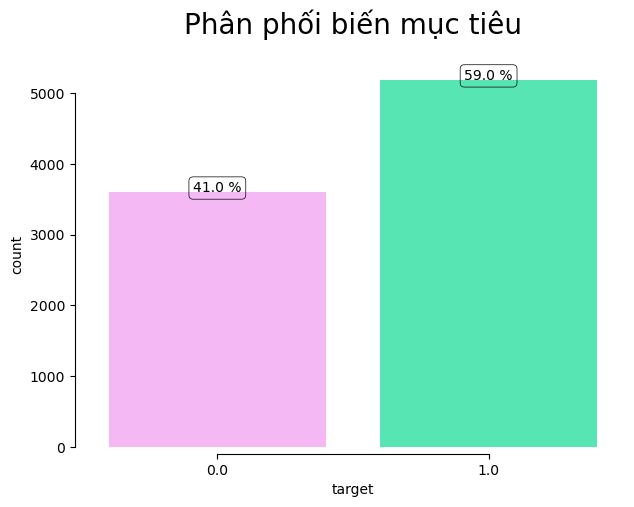

In [14]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='White')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('white')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Phân phối biến mục tiêu', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

In [15]:
#thống kê tóm tắt cho từng cột số 
# .T: để chuyển từ cột sang hàng
data[num_feats].describe().T

,count,mean,std,min,25%,50%,75%,max
Tuổi,8781.0,53.260904,9.266611,29.0,45.0,54.0,60.0,76.0
Cholesterol trong máu,8781.0,242.595035,44.525798,131.0,210.0,240.0,270.0,360.0
Huyết áp khi nghỉ ngơi,8781.0,128.759708,15.332945,94.0,120.0,130.0,140.0,170.0
Nhịp tim tối đa khi gắng sức,8781.0,151.617014,22.196428,88.0,138.0,156.0,169.0,202.0
Sự chênh lệch ST,8781.0,0.927150,1.015086,0.0,0.0,0.6,1.5,4.0
Số mạch máu chính bị hẹp,8781.0,0.468853,0.688891,0.0,0.0,0.0,1.0,2.0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử data là DataFrame của bạn
data['target'] = data['target'].astype(str)



C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3710120994.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3710120994.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3710120994.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3710120994.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes

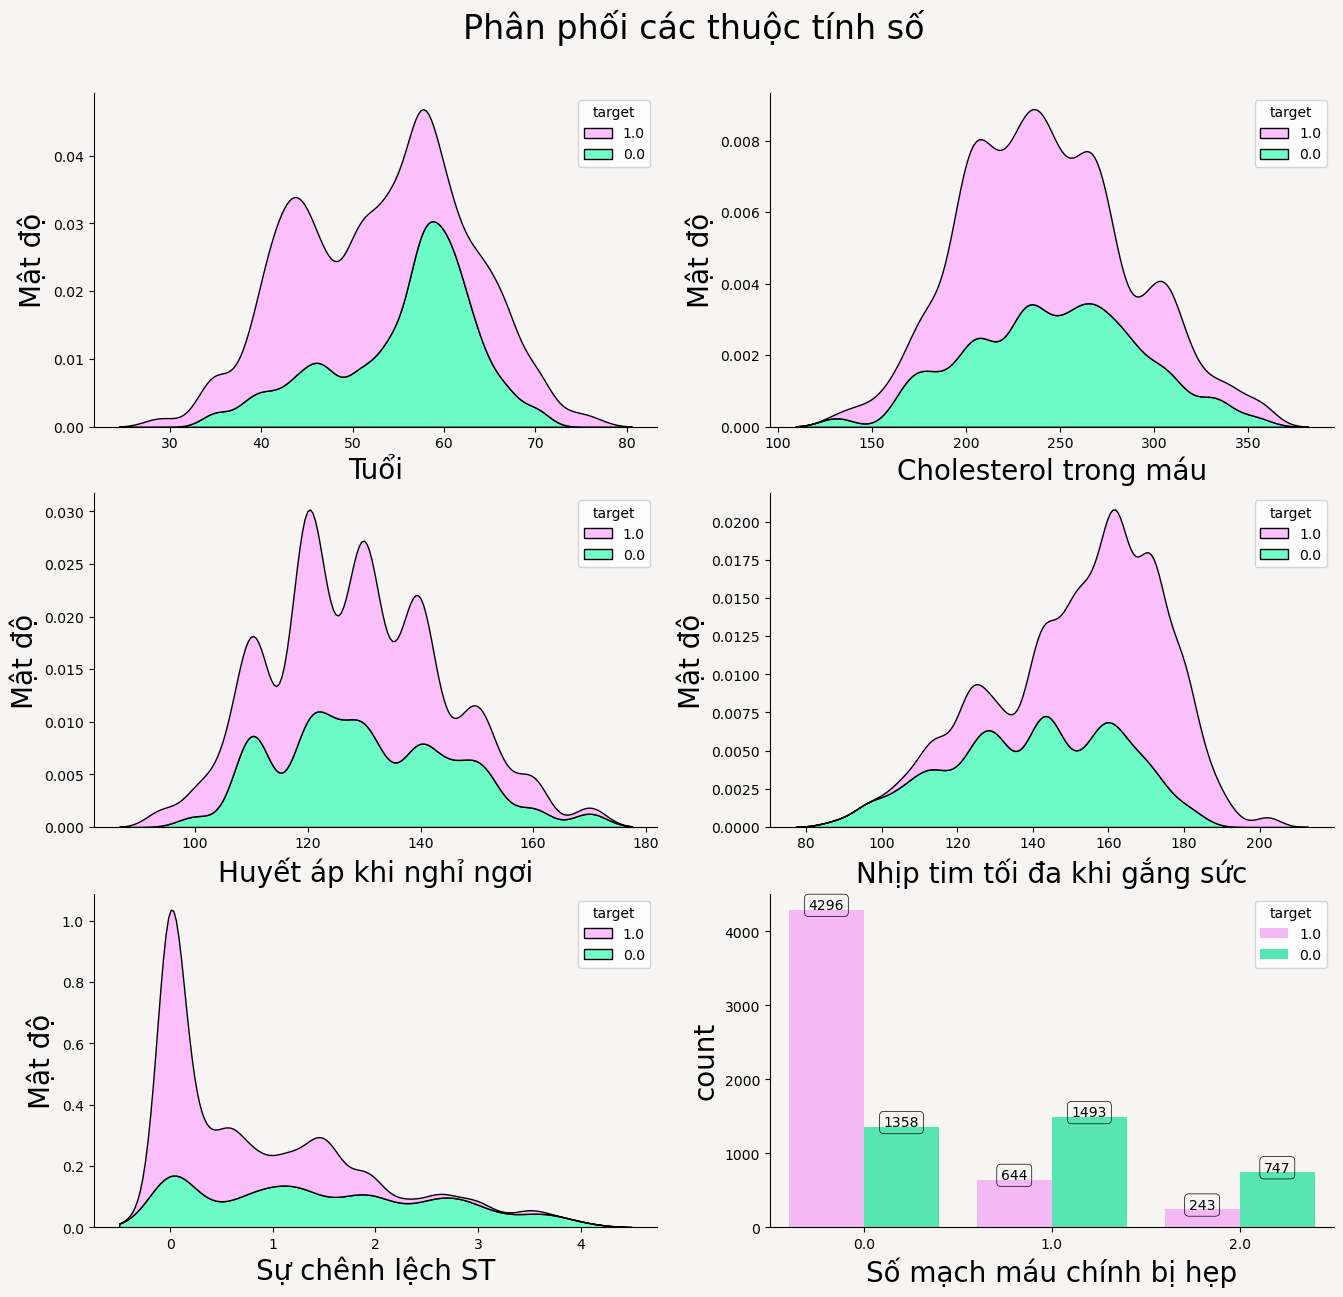

In [17]:
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))
#remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="target", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("Mật độ", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    if col == 'Số mạch máu chính bị hẹp':
        sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                      bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    i = i +1
plt.suptitle('Phân phối các thuộc tính số' ,fontsize = 24);

C:\HTTTQL\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


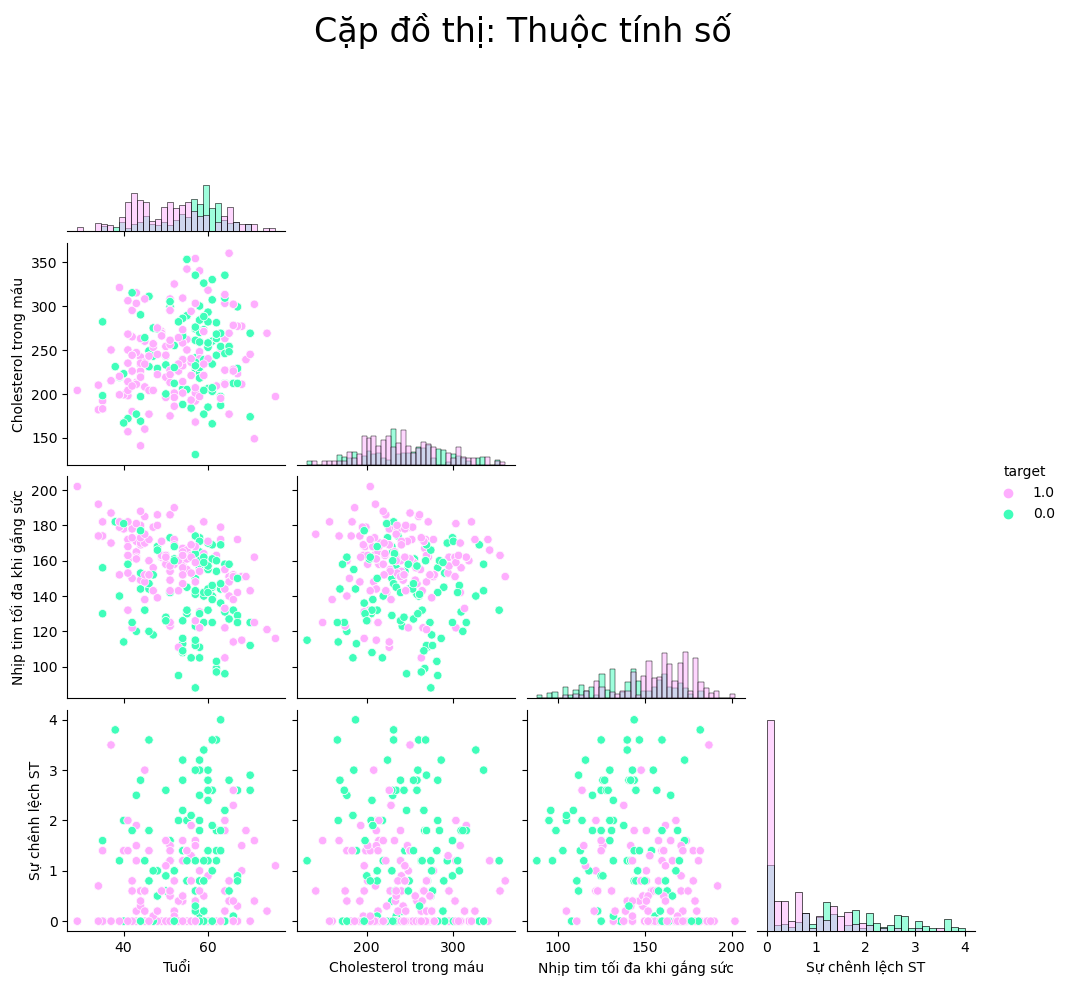

In [18]:

a = ['Tuổi', 'Cholesterol trong máu', 'Kết quả điện tâm đồ lúc nghỉ ngơi', 'Nhịp tim tối đa khi gắng sức', 'Sự chênh lệch ST', 'target']
data_ = data[a]
g = sns.pairplot(data_, hue="target", corner=True, diag_kind='hist', palette=mypal[1::4]);
plt.suptitle('Cặp đồ thị: Thuộc tính số ' ,fontsize = 24);

In [19]:
# fig, ax = plt.subplots(1,4, figsize=(22, 4))
# sns.regplot(data=data[data['target'] ==1], x='Tuổi', y='Cholesterol trong máu', ax = ax[0], color=mypal[0], label='1')
# sns.regplot(data=data[data['target'] ==0], x='Tuổi', y='Cholesterol trong máu', ax = ax[0], color=mypal[5], label='0')
# sns.regplot(data=data[data['target'] ==1], x='Tuổi', y='Nhịp tim tối đa khi gắng sức', ax = ax[1], color=mypal[0], label='1')
# sns.regplot(data=data[data['target'] ==0], x='Tuổi', y='Nhịp tim tối đa khi gắng sức', ax = ax[1], color=mypal[5], label='0')
# sns.regplot(data=data[data['target'] ==1], x='Tuổi', y='Kết quả điện tâm đồ lúc nghỉ ngơi', ax = ax[2], color=mypal[0], label='1')
# sns.regplot(data=data[data['target'] ==0], x='Tuổi', y='Kết quả điện tâm đồ lúc nghỉ ngơi', ax = ax[2], color=mypal[5], label='0')
# sns.regplot(data=data[data['target'] ==1], x='Tuổi', y='Sự chênh lệch ST', ax = ax[3], color=mypal[0], label='1')
# sns.regplot(data=data[data['target'] ==0], x='Tuổi', y='Sự chênh lệch ST', ax = ax[3], color=mypal[5], label='0')
# plt.suptitle('Biểu đồ của các thuộc tính được chọn')
# plt.legend();

C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\624523176.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='white')
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\624523176.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='white')
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\624523176.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrow, ncol, i, facecolor='white')
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\624523176.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprec

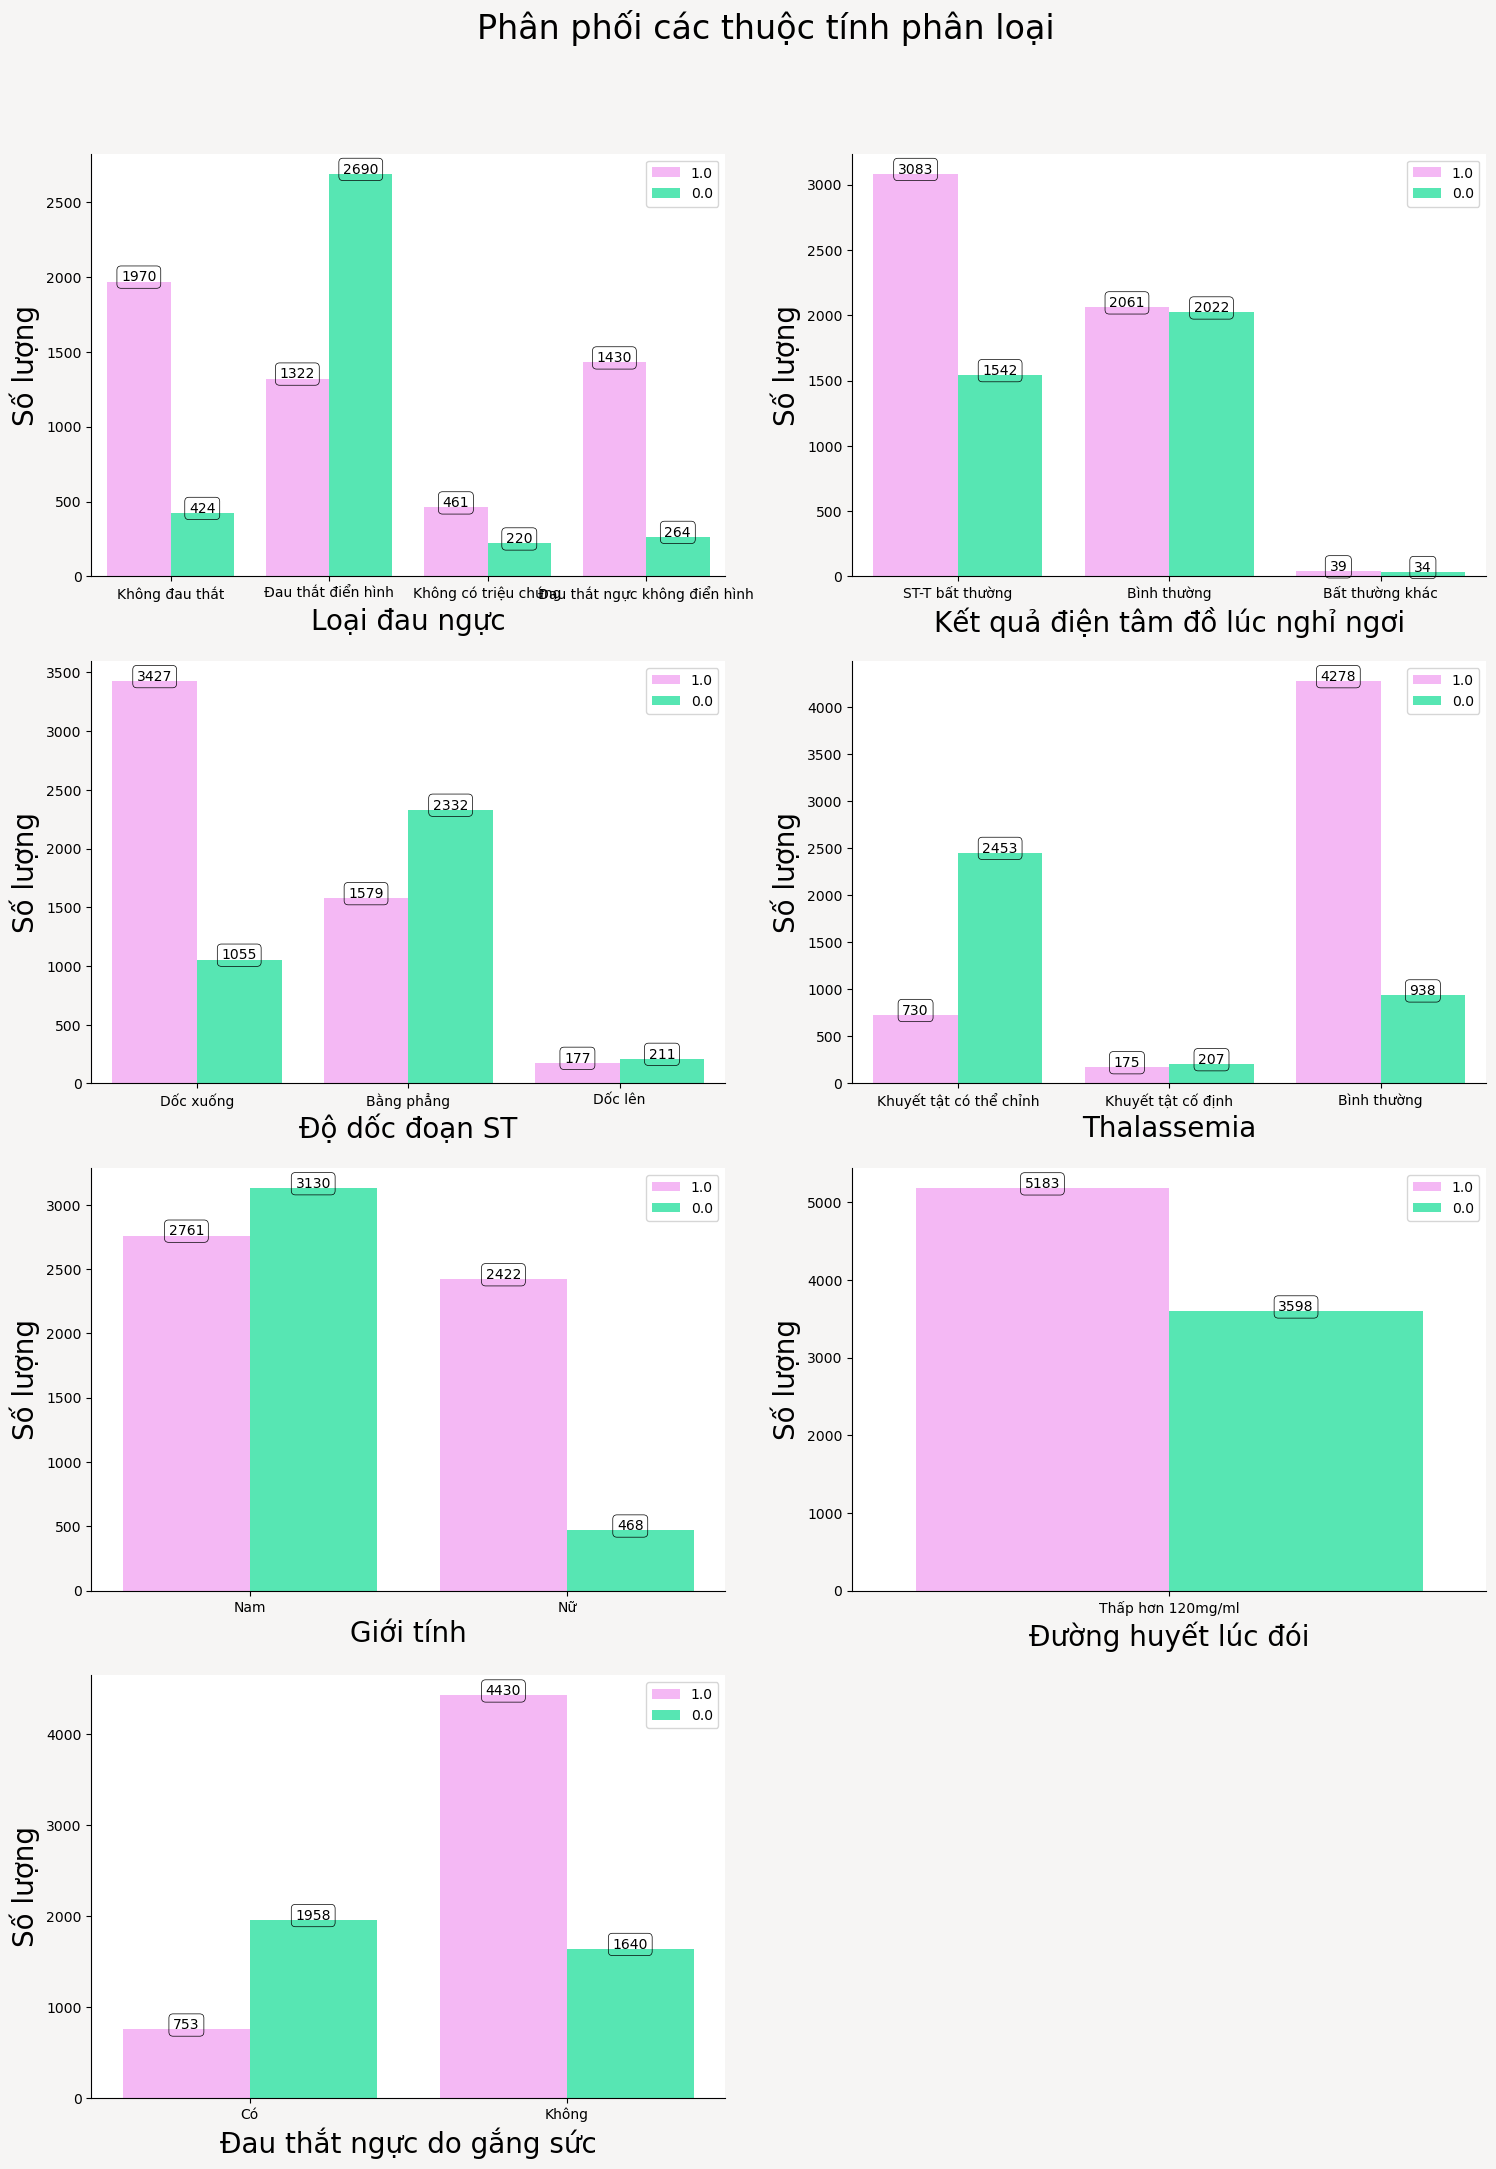

In [20]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='white')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("Số lượng", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='white')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Phân phối các thuộc tính phân loại' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

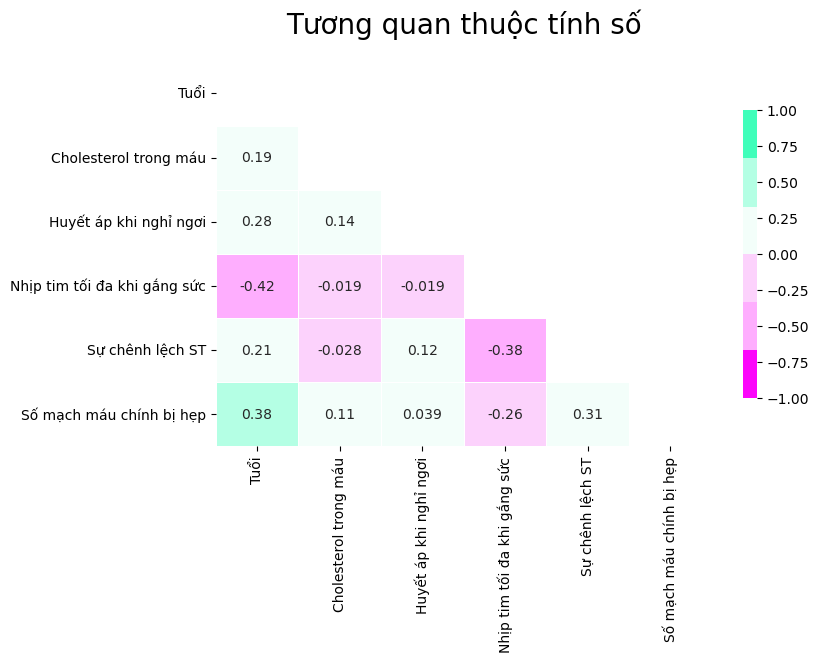

In [21]:
df_ = data[num_feats]
corr = df_.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Tương quan thuộc tính số", fontsize=20, y= 1.05);

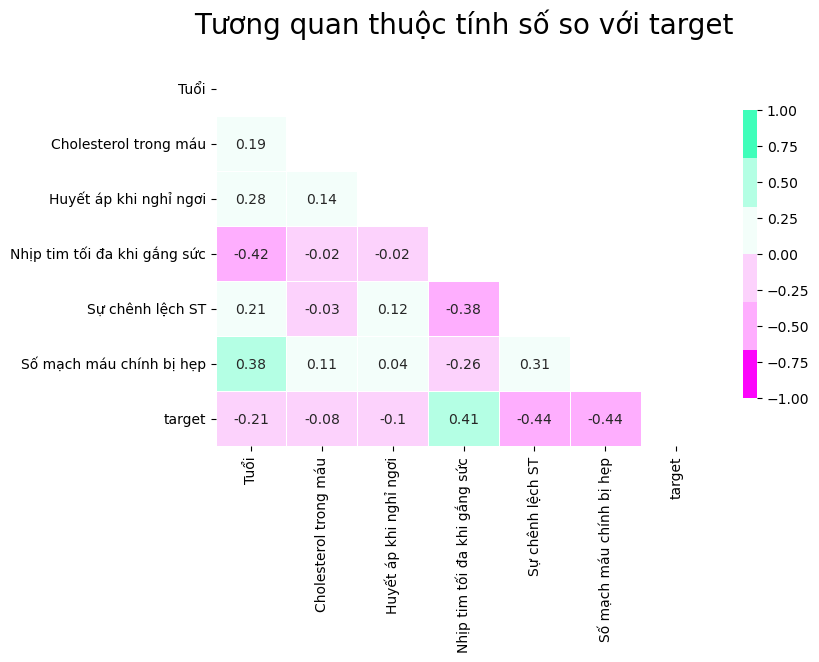

In [22]:
feats_ = ['Tuổi', 'Cholesterol trong máu', 'Huyết áp khi nghỉ ngơi', 'Nhịp tim tối đa khi gắng sức', 'Sự chênh lệch ST', 'Số mạch máu chính bị hẹp', 'target']

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]
# Chuyển đổi các cột cần thiết sang kiểu số nếu có thể
for col in feats_:
    data[col] = pd.to_numeric(data[col], errors='coerce')
rows= []
for x in feats_:
    col = []
    for y in feats_ :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[feats_].columns, index =data[feats_].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Tương quan thuộc tính số so với target", fontsize=20, y= 1.05);

C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3334269264.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3334269264.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3334269264.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3334269264.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3334269264.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\Users\HUONG\AppData\Local\Temp\ipykernel_15080\3334269264.py:12: RuntimeWarning: invalid value encount

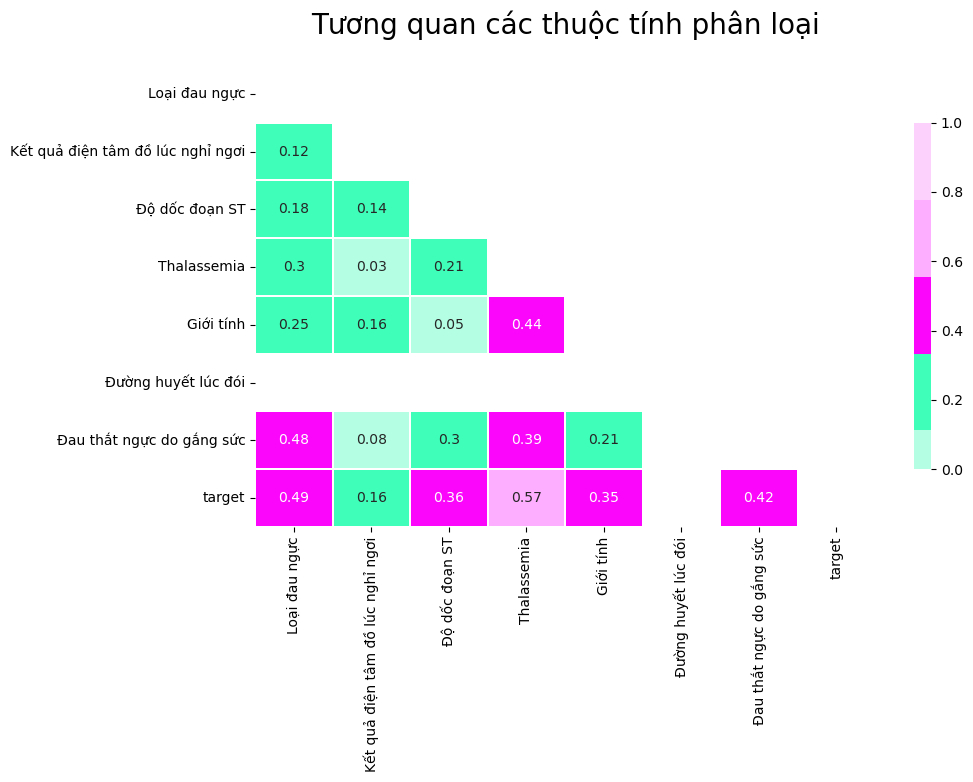

In [23]:
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
data_ = data[cat_feats]
rows= []
for x in data_:
    col = []
    for y in data_ :
        cramers =cramers_v(data_[x], data_[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_.columns, index = data_.columns)

# color palette 
mypal_1= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA', '#FC05FB', '#FEAEFE', '#FCD2FC']
# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(mypal_1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Tương quan các thuộc tính phân loại", fontsize=20, y= 1.05);

In [24]:
from sklearn.preprocessing import LabelEncoder

def lb_cat_feats(data, cat_feats):
    lb = LabelEncoder()
    data_encoded = data.copy()
    
    for col in cat_feats:
        data_encoded[col] = lb.fit_transform(data[col])
    
    data = data_encoded
    
    return data

In [25]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, auc

def score_summmary(names, classifiers):
    cols=["Classifier", "Accurancy", "ROC_AUC", "Recall", "Precision", "F1"]
    data_table=pd.DataFrame(columns=cols)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred=clf.predict(X_test)
        accurancy=accuracy_score(y_test,pred)

        pred_proba = clf.predict_proba(X_test)[:, 1]

        fpr, tpr, thresholds = roc_curve(y_test, pred_proba)        
        roc_auc = auc(fpr, tpr)

        # confusion matric, cm
        cm = confusion_matrix(y_test, pred) 

        # recall: TP/(TP+FN)
        recall = cm[1,1]/(cm[1,1] +cm[1,0])

        # precision: TP/(TP+FP)
        precision = cm[1,1]/(cm[1,1] +cm[0,1])

        # F1 score: TP/(TP+FP)
        f1 = 2*recall*precision/(recall + precision)

        df = pd.DataFrame([[name, accurancy*100, roc_auc, recall, precision, f1]], columns=cols)
        data_table = data_table.append(df)     

    return(np.round(data_table.reset_index(drop=True), 2))


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split datasets
data = lb_cat_feats(data, cat_feats)
features = data.columns[:-1]

X = data[features]
y = data['target']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Khởi tạo đối tượng SelectKBest với chi2 làm hàm kiểm định
# Chọn số lượng đặc trưng cần giữ lại (k) dựa trên mức độ quan trọng
k_best_features = 10  # Số lượng đặc trưng tốt nhất sẽ được chọn
selector = SelectKBest(score_func=chi2, k=k_best_features)

# Fit đối tượng SelectKBest vào dữ liệu và chọn ra các đặc trưng tốt nhất
X_new = selector.fit_transform(X, y)

# Lấy ra chỉ số của các đặc trưng được chọn
selected_features_indices = selector.get_support(indices=True)

# Chỉ lấy ra các đặc trưng được chọn từ dữ liệu X
X_selected = X.iloc[:, selected_features_indices]
#Hiện k đặc trưng đó
selected_feature_names = features[selected_features_indices]
print(selected_feature_names)



# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra sử dụng các đặc trưng được chọn
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=0)

# Các mô hình và tên tương ứng
names = ["LogisticRegression", "SVC", "DecisionTree"]
classifiers = [
    LogisticRegression(solver="liblinear", random_state=0),
    SVC(probability=True, random_state=0),
    DecisionTreeClassifier(random_state=0),
]

Index(['Tuổi', 'Giới tính', 'Loại đau ngực', 'Cholesterol trong máu',
       'Nhịp tim tối đa khi gắng sức', 'Đau thắt ngực do gắng sức',
       'Sự chênh lệch ST', 'Độ dốc đoạn ST', 'Số mạch máu chính bị hẹp',
       'Thalassemia'],
      dtype='object')


In [27]:
score_summmary(names, classifiers).sort_values(by='Accurancy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["ROC_AUC",], color='#6495ED')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')

AttributeError: 'DataFrame' object has no attribute 'append'

C:\HTTTQL\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 83.51548269581056
Accuracy of Decision Tree: 100.0
Accuracy of SVM: 69.48998178506375


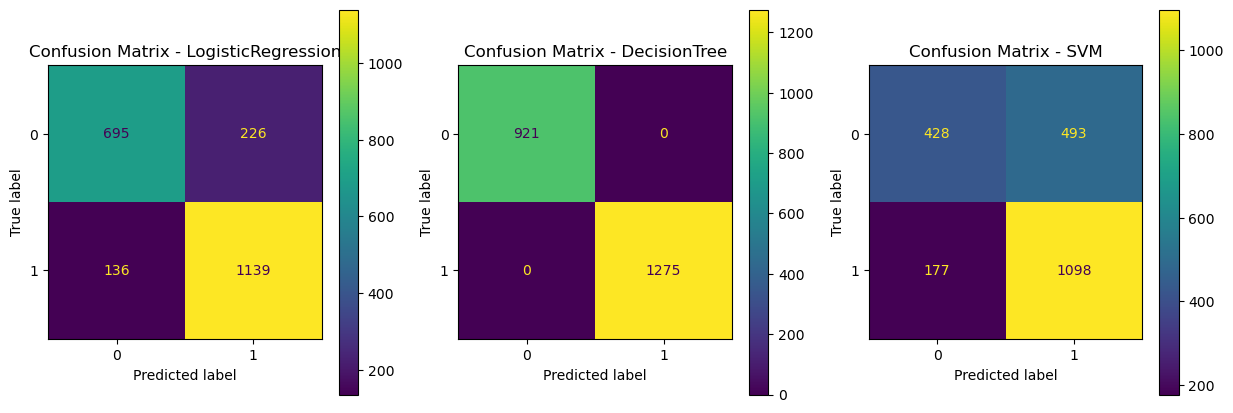

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

logistic_model = LogisticRegression(random_state=0)
decision_tree_model = DecisionTreeClassifier(random_state=0)
svm_model = SVC(random_state=0)  

logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)  

logistic_predictions = logistic_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)  

logistic_cm = confusion_matrix(y_test, logistic_predictions, labels=logistic_model.classes_)
decision_tree_cm = confusion_matrix(y_test, decision_tree_predictions, labels=decision_tree_model.classes_)
svm_cm = confusion_matrix(y_test, svm_predictions, labels=svm_model.classes_)  

#ĐỘ CHÍNH XÁC TỪNG MÔ HÌNH
logistic_accuracy = accuracy_score(y_test, logistic_predictions)*100
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)*100
svm_accuracy = accuracy_score(y_test, svm_predictions)*100

print("Accuracy of Logistic Regression:", logistic_accuracy)
print("Accuracy of Decision Tree:", decision_tree_accuracy)
print("Accuracy of SVM:", svm_accuracy)



fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, cm, model_name in zip(axes, [logistic_cm, decision_tree_cm, svm_cm], ['LogisticRegression', 'DecisionTree', 'SVM']):  # Thay thế "NuSVC" thành "SVM" trong dòng này
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=ax)
    ax.set_title(f"Confusion Matrix - {model_name}")

plt.show()


In [29]:
#Parameter Tuning: Điều chỉnh tham số cho thuật toán Logistic Regression bằng Randomized Search
#Có điều chỉnh lại pp chia dataset bằng Repeated Stratufied KFold

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RepeatedStratifiedKFold


lr = LogisticRegression(tol=1e-4, max_iter=1000, random_state=0)

space = dict(C=uniform(loc=0, scale=5),
                     penalty=['l2', 'l1'],
                     solver= ['liblinear'])

search = RandomizedSearchCV(lr, 
                         space, 
                         random_state=0,
                         cv = 5, 
                         scoring='f1')

rand_search = search.fit(X_train, y_train)

print('Best Hyperparameters: %s' % rand_search.best_params_)

Best Hyperparameters: {'C': 0.2835648865872159, 'penalty': 'l2', 'solver': 'liblinear'}


In [30]:
from sklearn.metrics import classification_report

params = rand_search.best_params_
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       921
           1       0.84      0.89      0.86      1275

    accuracy                           0.84      2196
   macro avg       0.84      0.83      0.83      2196
weighted avg       0.84      0.84      0.84      2196



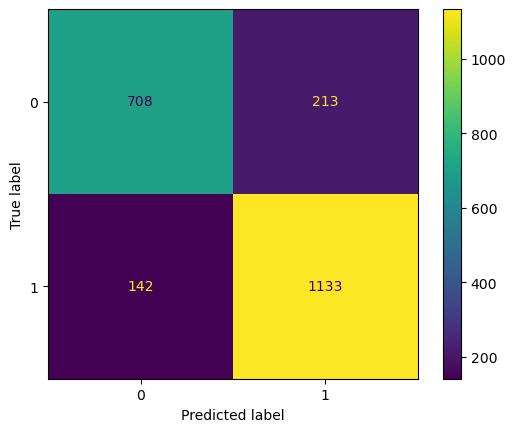

In [31]:
# Tạo ma trận nhầm lẫn (confusion matrix)
cm = confusion_matrix(y_test, lr.predict(X_test))

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Nhận xét: Việc điều chỉnh tham số  làm tăng hiệu suất của mô hình chứng tỏ ngay từ đầu mô hình Logistic Regression đã cho kết quả đáng tin cậy (XEM LẠI NHẬN XÉT LÀ TĂNG ÍT NHA M)

Best parameters found:  {'kernel': 'linear', 'degree': 2, 'C': 10}
Best cross-validation score:  0.8460136674259682
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       921
           1       0.85      0.86      0.85      1275

    accuracy                           0.83      2196
   macro avg       0.83      0.82      0.82      2196
weighted avg       0.83      0.83      0.83      2196

Accuracy SVM:  82.92349726775956


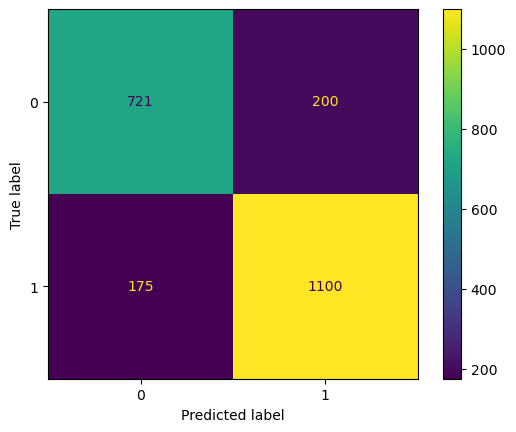

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Định nghĩa mô hình SVM
svm = SVC()

# Định nghĩa Hyperparameter
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # kernel = linear thì là trường hợp lí tưởng, gần như ko sử dụng
    'degree': [2, 3, 4] # chỉ sd cho poly
}

# Biểu diễn RandomizedSearch với Cross Validation
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=10, cv=5)

# Huấn luyện mô hình
random_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Dự đoán và báo cáo kết quả
y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

# Độ chính xác của mô hình
print("Accuracy SVM: ", accuracy_score(y_test, y_pred) * 100)

# Ma trận nhầm lẫn (confusion matrix)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


SVM có một số siêu tham số quan trọng như siêu tham số C, kernel, và gamma. Việc lựa chọn các giá trị phù hợp cho các siêu tham số này có thể ảnh hưởng đến hiệu suất của mô hình. Nếu không điều chỉnh siêu tham số tốt, SVM có thể không hoạt động hiệu quả. Độ chính xác tăng từ 64,8% lên 83%

Ngoài các thuật toán phân lớp truyền thống trên, nhóm đề xuất thực hiện thêm 1 thuật toán ML là LGBM để xem mô hình học máy có thể cải thiện hiệu suất hơn nữa không

In [30]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Khởi tạo mô hình LightGBM với tham số mặc định
lgbm = lgb.LGBMClassifier()

# Huấn luyện mô hình với callbacks
lgbm.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         callbacks=[lgb.early_stopping(stopping_rounds=50),
                    lgb.log_evaluation(50)])

# Đánh giá mô hình
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 125, number of negative: 97
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.563063 -> initscore=0.253603
[LightGBM] [Info] Start training from score 0.253603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

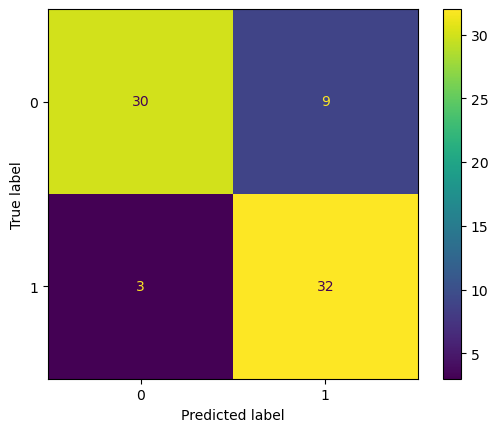

In [31]:
# Tạo ma trận nhầm lẫn (confusion matrix)
cm = confusion_matrix(y_test, lgbm.predict(X_test))

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Với thuật toán LGBM, ta có thể làm tăng độ đo Recall lên 89%, đồng thời giảm số lượng FN xuống 4 (so với 5 khi chạy mô hình Logistic Regression). Tuy nhiên lại làm giảm số lượng TP từ 32 xuống 31. 